In [1]:
from FileSelector import *
from Recognizer import *

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import matplotlib.animation as animation

from matplotlib.patches import Rectangle
from matplotlib.animation import FuncAnimation
from matplotlib import style

import imageio

from PIL import Image

import json
import os
from pathlib import Path
import numpy as np

In [2]:
selector = SelectFilesButton()

In [3]:
selector

SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

In [10]:
selector.files

['C:/Users/admin/Desktop/plate_project/assets/my_car.mp4']

### If you selected an image
##### If you have selected an image, please run the following cells, otherwise skip to where the video part is
You need to run the following cell. No parameters are required


In [5]:
my_image = os.path.normpath(selector.files[0])

In [6]:
# used for images when we draw the boxes using matplotlib
def get_boxes(node):
    boxes = []
    for result in node[0]['results']:
        box = result['box']
        pos, length, hight = (box['xmin'], box['ymin']), box['xmax'] - box['xmin'], box['ymax'] - box['ymin']
        boxes.append((pos, length, hight))
        
    return boxes

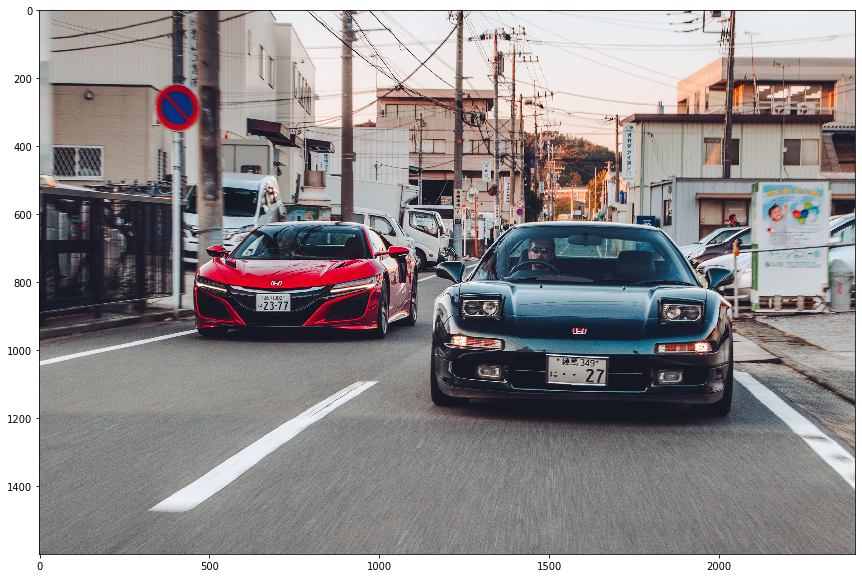

In [7]:
img = plt.imread(my_image)
plt.figure(figsize = (20,10))
plt.imshow(img)

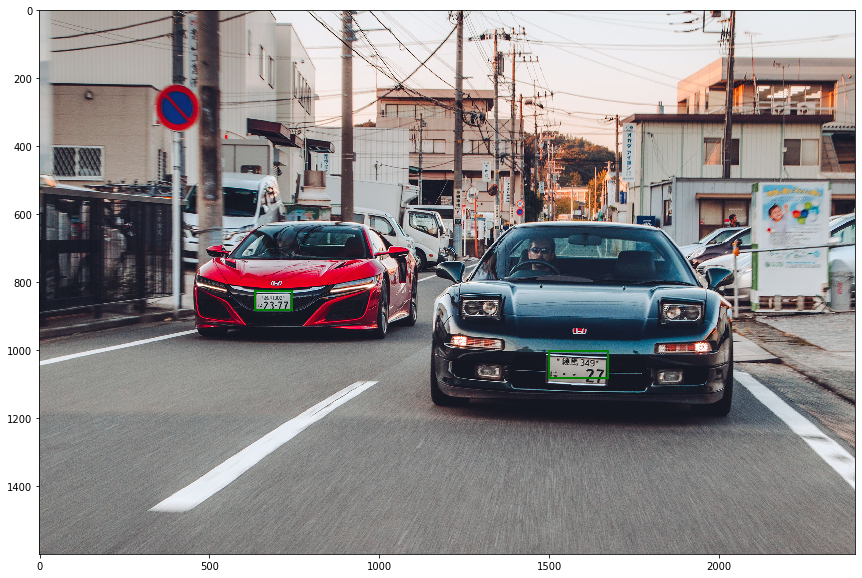

In [9]:
img = plt.imread(my_image)

node = recognize_img(my_image)
plt.figure(figsize = (20,10))
plt.imshow(img)
ax = plt.gca()

boxes = get_boxes(node)

for box in boxes:
    # Create a Rectangle patch
    rect = Rectangle(box[0],box[1],box[2],linewidth=2,edgecolor='g',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)

### If you selected a video

The default values of parameters: $start = 0$, $end = 40$, $skip = 3$

This will generate the info for the frames $[3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39]$

In [11]:
my_video = os.path.normpath(selector.files[0])
my_dir = Path(my_video).parent

start = 0
end = 400
skip = 20

images, results = recognize_vid(my_video, start, end, skip)

Reading frame 20
Reading frame 40
Reading frame 60
Reading frame 80
Reading frame 100
Reading frame 120
Reading frame 140
Reading frame 160
Reading frame 180
Reading frame 200
Reading frame 220
Reading frame 240
Reading frame 260
Reading frame 280
Reading frame 300
Reading frame 320
Reading frame 340
Reading frame 360
Reading frame 380
Reading frame 400


In [12]:
# used for images when we draw the boxes using opencv
def get_boxes_cv(node):
    boxes = []
    for result in node['results']:
        box = result['box']
        boxes.append(((box['xmin'], box['ymin']), (box['xmax'], box['ymax'])))
    return boxes

In [13]:
frames = []
for i, r in zip(images, results):
    boxes = get_boxes_cv(r)
    if len(box) == 0:
        im_arr = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    else:
        for box in boxes:
            cv2.rectangle(i, box[0], box[1], color=(0, 255, 255), thickness=2)
        im_arr = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    frames.append(im_arr)

In [14]:
# save the gif file
temp_file = 'assets\\my_car.gif'
imageio.mimsave(temp_file, frames, duration=1)

In [15]:
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))

In [16]:
display_gif(temp_file)